# 8. 도식화와 시각화(Plotting and Visualization)
#### o 시각화의 유용성
 - 특이값 찾기
 - 데이터 변형 필요성 파악
 - 모델링 방향 도출
 
#### o matplotlib 개요
 - 2D 도표에 중점을 둔 데스크톱 패키지
 - 개발자: 2002년 존헌터
 - Ipython과 matplotlib을 통합: 
  - 인터랙티브한 기능, 
  - PDF, SVG, JPG, PNG, GMP, GIF 등으로 저장 가능
  - 실행방법:
    - ipython pylab  
    - ipython 안에서 매직함수 %pylab inline or %matplotlib inline 
    참고) jupyer notebook은 
 - matplotlib의 확장
   - matplot3d : 3D 확장
   - basemap: 지도와 투영
 - 본 장의 한계: matplotlib의 주요특징만 기술 ==> 보다 많은 자료참고: https://matplotlib.org/ 

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt  # 참고) matplotlib 의 API함수는 pyplot 서브모듈에 저장되어 있음. 
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4)

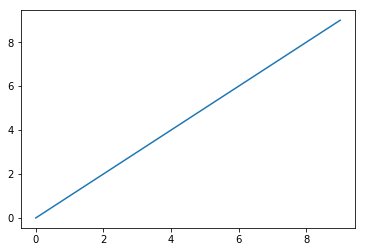

In [2]:
plt.plot(np.arange(10))

In [3]:
%matplotlib inline

In [4]:
%pylab inline
%gui

Populating the interactive namespace from numpy and matplotlib


In [5]:
%pwd

u'C:\\Dropbox (\uac1c\uc778\uc6a9)\\2018KPUWork\\10 \uac15\uc758-201801\ud559\uae30\\201803 \ube45\ub370\uc774\ud130\\03 \uac15\uc758\uad50\uc548\\\ud30c\uc774\uc36c\ub370\uc774\ud130\ubd84\uc11d'

## 8.1 matplotlib API 기초 (A brief matplotlib API primer)

In [6]:
import matplotlib.pyplot as plt

### 8.1.1 Figures and Subplots
#### o plt.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
- Creates a new figure
- Parameters
 - num : integer or string, optional, default: none
   - None: a new figure will be created, and the figure number will be incremented. The figure objects holds this number in a number attribute. 
   - 기존재하는 id : make it active, and returns a reference to it. 
   - 비존재 id: create it and returns it. 
   - If num is a string, the window title will be set to this figure’s num.
 - figsize: tuple of integers, optional, default: None
   - width, height in inches. If not provided, defaults to rc figure.figsize.
- Returns:
  - figure : The Figure instance returned will also be passed to new_figure_manager in the backends, which allows to hook custom Figure classes into the pylab interface. 

In [7]:
fig = plt.figure()
fig

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

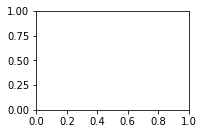

In [8]:
ax1 = fig.add_subplot(2, 2, 1)
fig

#### o fig.add_subplot(\*args, \**kwargs)
- https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html
- Add a subplot.
- Parameters:
 - *args: Either a 3-digit integer or three separate integers describing the position of the subplot. If the three integers are R, C, and P in order, the subplot will take the Pth position on a grid with R rows and C columns.
 - **kwargs: This method also takes the keyword arguments for Axes.
- Returns:
 - The axes of the subplot.

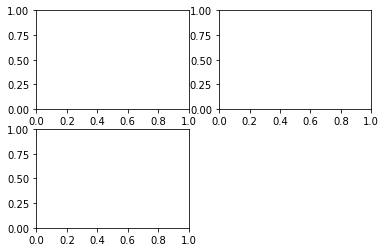

In [9]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig

#### o pyplot.plot(\*args, \**kwargs)
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
- Plot y versus x as lines and/or markers.
- plot([x], y, [fmt], data=None, \**kwargs)
- plot([x], y, [fmt], [x2], y2, [fmt2], ..., \**kwargs)
- plot('xlabel', 'ylabel', data=obj)
 - x, y : array-like or scalar, 
   - The horizontal / vertical coordinates of the data points. 
   - x values are optional. If not given, they default to [0, ..., N-1].
 - fmt: str, optional  # See the link above
   - A format string, e.g. ‘ro’ for red circles. 
   - Format strings are just an abbreviation for quickly setting basic line properties. 
   - All of these and more can also be controlled by keyword arguments.
 - data: indexable object, optional   - 

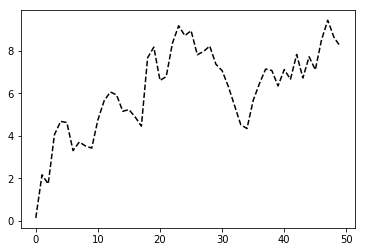

In [10]:
from numpy.random import randn
random.seed(120)
plt.plot(randn(50).cumsum(), 'k--') # k-- : black dashed line 

#### o matplotlib.axes.Axes.hist , matplotlib.pyplot.hist
- Axes.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)

- matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)

- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist

- Compute and draw the histogram of x. The return value is a tuple (n, bins, patches) or ([n0, n1, …], bins, [patches0, patches1,…]) if the input contains multiple data.

- Parameters
 - x : (n,) array or sequence of (n,) arrays
   - Input values, this takes either a single array or a sequence of arrays which are not required to be of the same length
 - bins : integer or sequence or ‘auto’, optional
   - If an integer is given, bins + 1 bin edges are calculated and returned, consistent with numpy.histogram().
   - If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.
   - All but the last (righthand-most) bin is half-open. In other words, if bins is:[1, 2, 3, 4] then the first bin is [1, 2) (including 1, but excluding 2) and the second [2, 3). The last bin, however, is [3, 4], which includes 4.
 - range : tuple or None, optional
   - The lower and upper range of the bins. Lower and upper outliers are ignored. If not provided, range is (x.min(), x.max()). Range has no effect if bins is a sequence.
 - alpha : alpha : 0 <= scalar <= 1 or None, optional # See hist2D 
   - The alpha blending value.

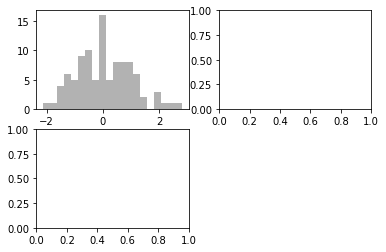

In [11]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
fig

#### o Axes.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, data=None, **kwargs)
- https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html
- A scatter plot of y vs x with varying marker size and/or color.
- Parameters: 
 - x, y : array_like, shape (n, ) The data positions.
 - s : scalar or array_like, shape (n, ), optional
  The marker size in points**2. Default is rcParams['lines.markersize'] ** 2.
 - c : color, sequence, or sequence of color, optional, default: ‘b’

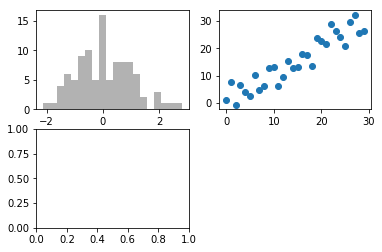

In [12]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))
fig

In [13]:
plt.close('all')

#### o matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
- Create a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
- Parameters
 - nrows, ncols : int, optional, default: 1, 
   - Number of rows/columns of the subplot grid.
 - sharex, sharey : bool or {‘none’, ‘all’, ‘row’, ‘col’}, default: False
   - Controls sharing of properties among x (sharex) or y (sharey) axes:
     - True or ‘all’: x- or y-axis will be shared among all subplots.
     - False or ‘none’: each subplot x- or y-axis will be independent.
     - ‘row’: each subplot row will share an x- or y-axis.
     - ‘col’: each subplot column will share an x- or y-axis.

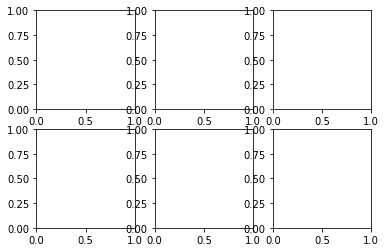

In [14]:
fig, axes = plt.subplots(2, 3)

In [15]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B75C780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C01CA90>]], dtype=object)

#### o Adjusting the spacing around subplots
- o subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)
 - left  = 0.125  # the left side of the subplots of the figure
 - right = 0.9    # the right side of the subplots of the figure
 - bottom = 0.1   # the bottom of the subplots of the figure
 - top = 0.9      # the top of the subplots of the figure
 - wspace = 0.2   # the amount of width reserved for space between subplots,expressed as a fraction of the average axis width           
 - hspace = 0.2   # the amount of height reserved for space between subplots, expressed as a fraction of the average axis height

In [16]:
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

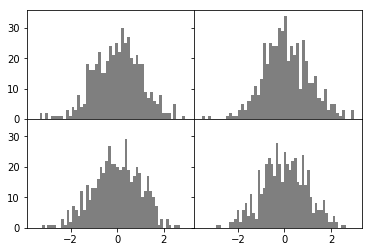

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
#fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0., hspace=0.)

### 8.1.2 Colors, markers, and line styles
#### o Colors 
 - 위에서 이미 설명한 다음 link의 fmt 참고
 - https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
 - 별도 파라미터 표기방법: 예) ax.plot(x,y, linestyle='--', color='g')
 - RGB값(.#CECECE) 을 이용한 지정도 가능 

#### o Makers
- fmt 형식 표현: 위 링크의 fmt에서 표기 방법 참고
- 별도 파라미터 표기방법: ax.plot(x,y, linestyle='--', color='g', marker='o');

In [18]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

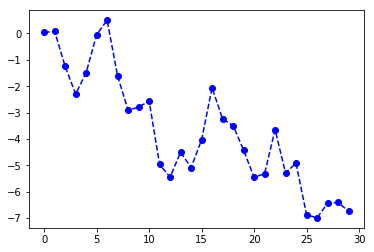

In [19]:
plt.plot(randn(30).cumsum(), 'bo--')

In [20]:
plt.close('all')

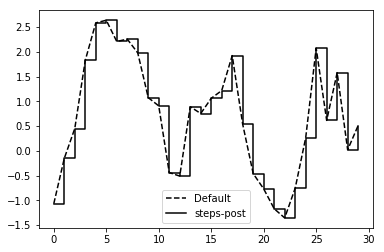

In [21]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 8.1.3 눈금(Ticks), 라벨(labels), and 범례(legends)
- 참고) 나머지 8.1의 내용은 자체 학습, 8.2 Pandas에서 그래프 그리고로 skip
- 그래프 꾸미기 2가지 방법: pyplot 인터페이스 이용, matplotlib 제공 API 

#### Setting the title, axis labels, ticks, and ticklabels

Text(0.5,0,'Stages')

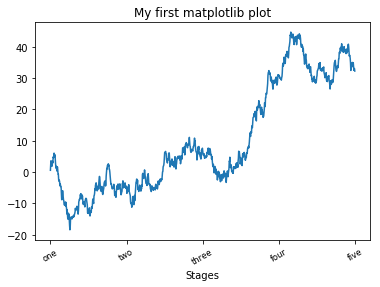

In [22]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

#### Adding legends

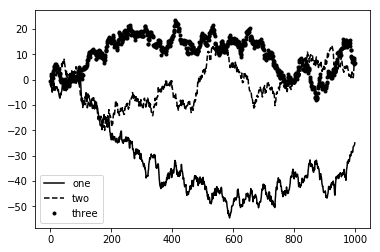

In [23]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and drawing on a subplot

Text(0.5,1,'Important dates in 2008-2009 financial crisis')

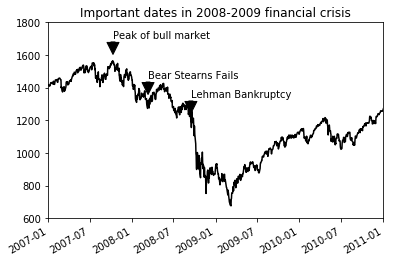

In [24]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

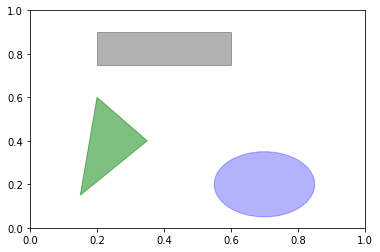

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

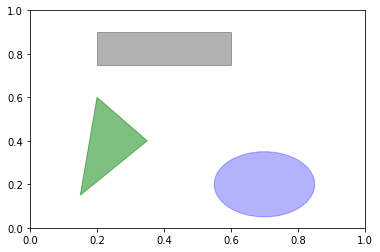

In [26]:
fig

In [27]:
fig.savefig('figpath.svg')

In [28]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [29]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib configuration

In [30]:
plt.rc('figure', figsize=(10, 10))

In [31]:
plt.close('all')

## 8.2 Plotting functions in pandas

### 8.2.1 Line plots
- Series와 DataFrame 모두 선을 그리는 plot method 제공

#### o Series.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
 - https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html
 - Series의 색인과 값을 이용해 그래프 그리기
 - Parameters:
   - kind : str
     - line: line plot (default) 
     - bar : vertical bar plot 
     - barh : horizontal bar plot 
     - hist : histogram 
     - box : boxplot 
     - kde : Kernel Density Estimation plot 
     - density : same as ‘kde’ 
     - area : area plot 
     - pie : pie plot 
     - 참고) Each plot kind has a corresponding method on the Series.plot accessor: s.plot(kind='line') is equivalent to s.plot.line().

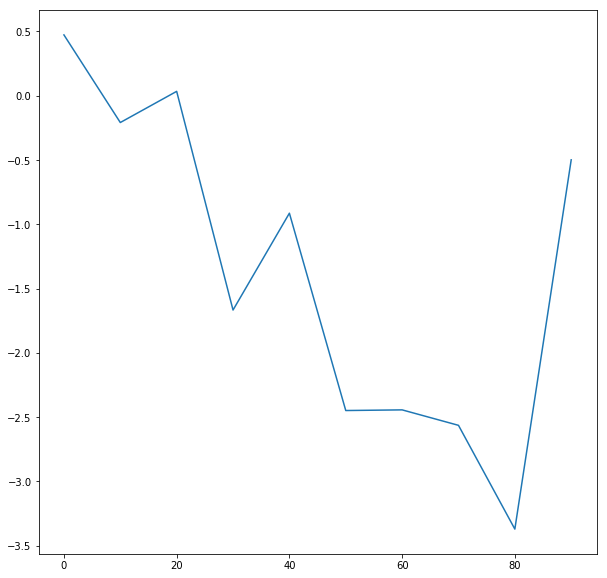

In [32]:
np.random.seed(12)
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

#### o DataFrame.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
- Each plot kind has a corresponding method on the DataFrame.plot accessor: df.plot(kind='line') is equivalent to df.plot.line().
- Parameter: 
 - x : label or position, default None
 - y : label or position, default None 
 - kind: Series의 값에서 다음이 추가됨
   - ‘scatter’ : scatter plot
   - ‘hexbin’ : hexbin plot
 - 기타: 링크 문서 참고 

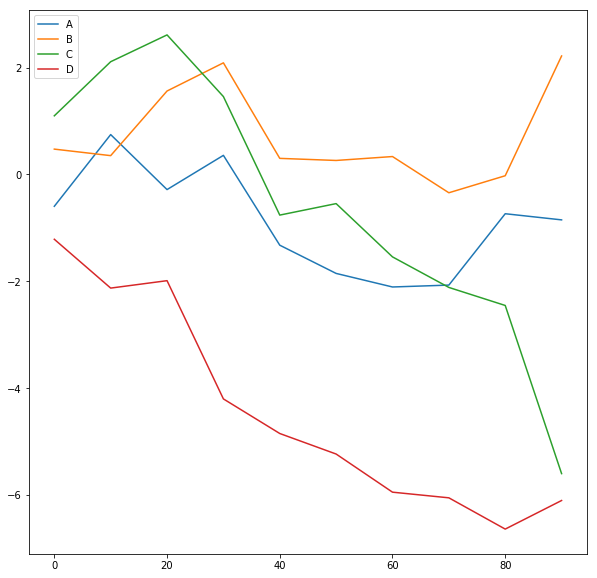

In [33]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

### 8.2.2 Bar plots
- kind='bar' or 'barh'를 활용
- Series와 DataFrame의 색인은 기준축의 값으로 사용됨. 

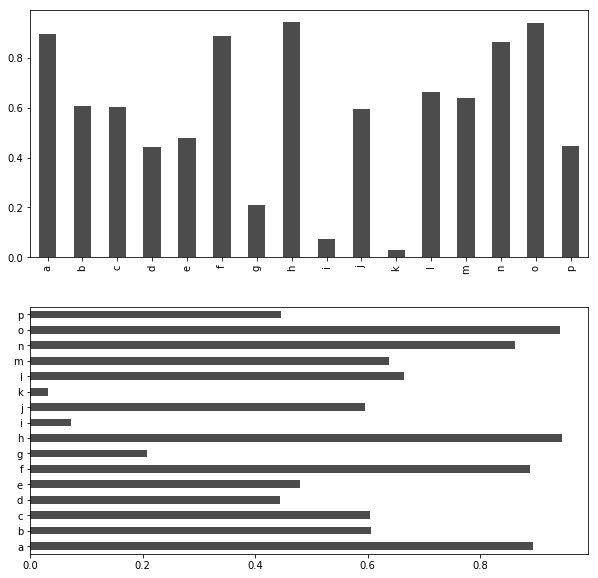

In [34]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

In [35]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.669958,0.924331,0.619423,0.322586
two,0.319476,0.291457,0.957417,0.405958
three,0.946556,0.857191,0.688928,0.003288
four,0.900103,0.919865,0.005909,0.642926
five,0.385217,0.595742,0.610807,0.599619
six,0.312284,0.069874,0.800734,0.911434


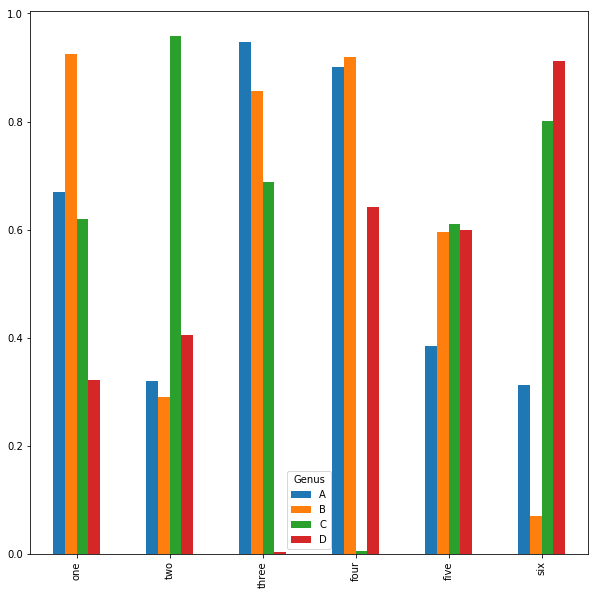

In [36]:
df.plot(kind='bar')

In [37]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

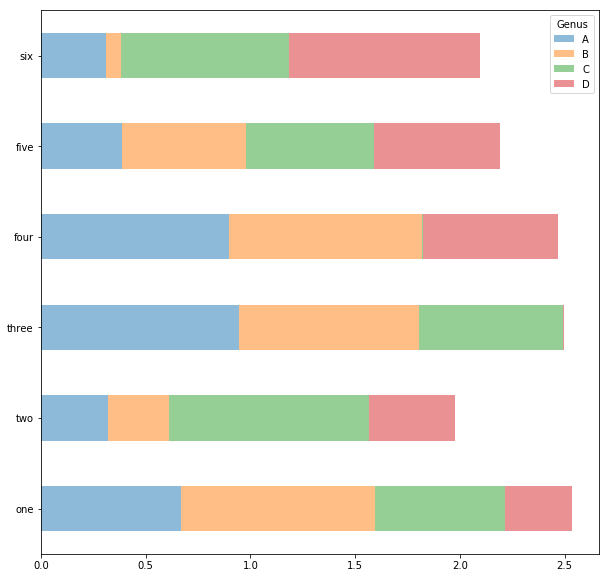

In [38]:
# See: stacked - 그래프 누적, alpha - 투명도
df.plot(kind='barh', stacked=True, alpha=0.5)

#### o 문제: 요일별 파티수를 정리하고, 파티숫자 대비 팁을 많이 주는 요일을 구하자. 

In [39]:
tips = pd.read_csv('ch08/tips.csv')
tips[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


#### o pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
- Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed
- Parameters:
 - index : array-like, Series, or list of arrays/Series, Values to group by in the rows
 - columns : array-like, Series, or list of arrays/Series, Values to group by in the columns
 - values : array-like, optional, Array of values to aggregate according to the factors. Requires aggfunc be specified.
 - aggfunc : function, optional, If specified, requires values be specified as well

In [40]:
party_counts = pd.crosstab(tips['day'], tips['size'])
# party_counts = pd.crosstab(tips['day'], tips['time'])
#party_counts = pd.crosstab(tips['sex'], tips['time'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [41]:
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


#### o DataFrame.div(other, axis='columns', level=None, fill_value=None)
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.div.html
- Floating division of dataframe and other, element-wise (binary operator truediv).
- Parameters:
 - other : Series, DataFrame, or constant
 - axis : {0, 1, ‘index’, ‘columns’}, For Series input, axis to match Series index on

In [42]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
# party_counts.sum(1)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


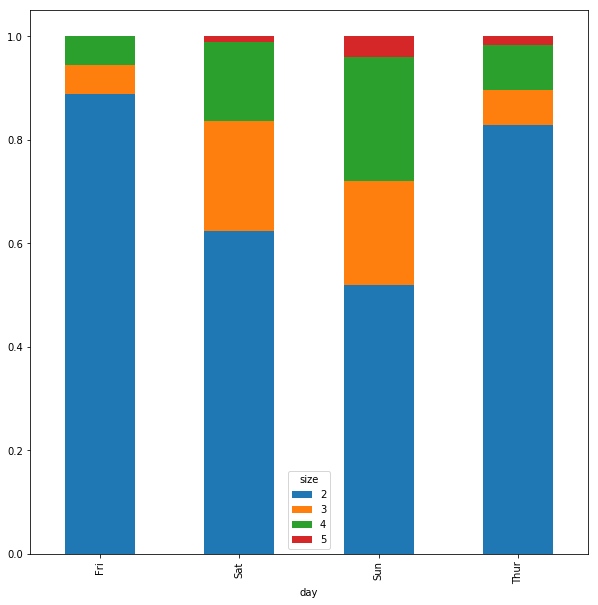

In [43]:
party_pcts.plot(kind='bar', stacked=True)

### 8.2.3 Histograms and density plots
o 결제금액대비 팁의 비율 산출 히스토그램 만들기

In [44]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

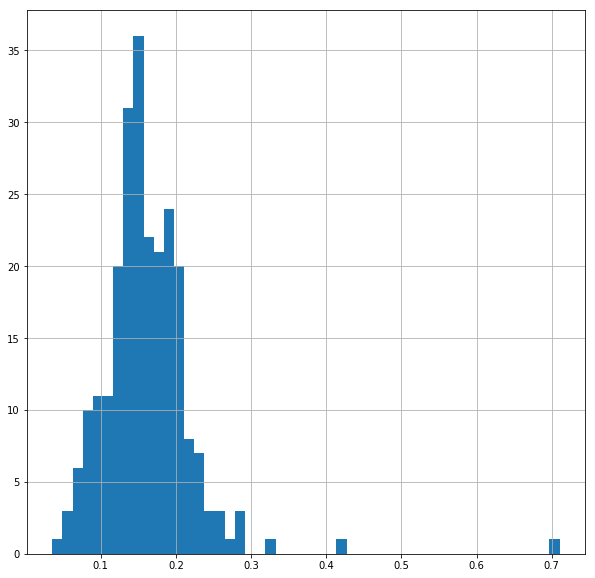

In [45]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

In [46]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

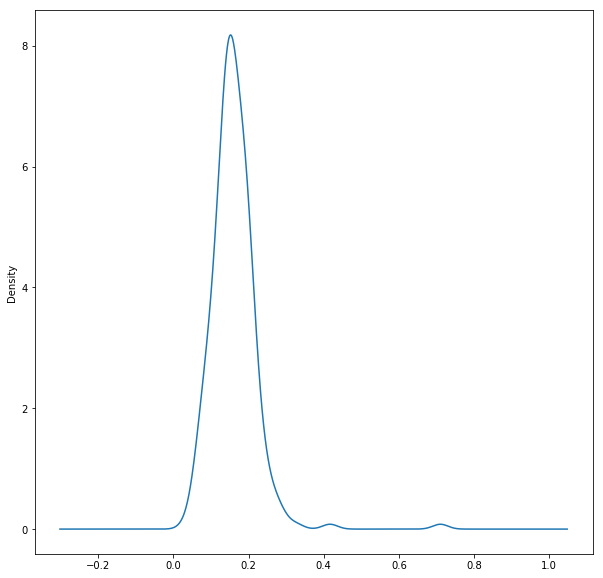

In [47]:
# kde : Kernel Density Estimation plot
# https://en.wikipedia.org/wiki/Kernel_density_estimation
# http://darkpgmr.tistory.com/147
# As a result, a kind of smoothing function, which is probability density based on histogram data
tips['tip_pct'].plot(kind='kde') 

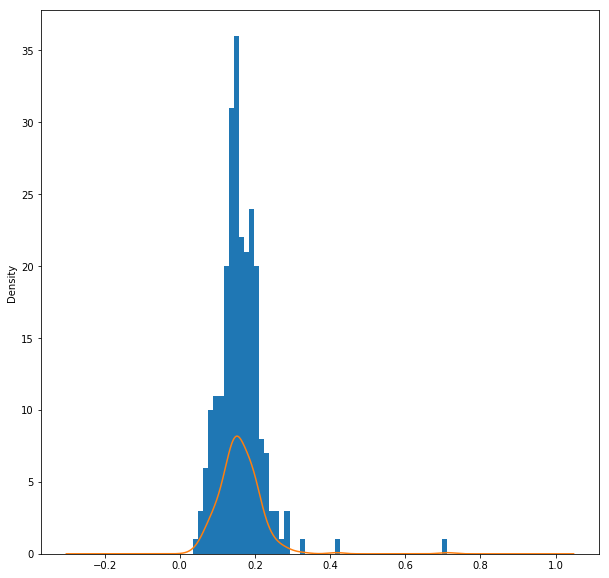

In [48]:
# 보통은 히스토그램과 KDE를 함께 보여줌
tips['tip_pct'].hist(bins=50)
tips['tip_pct'].plot(kind='kde') 

In [49]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [50]:
# 두개 정규분포의 확률밀도 예
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp1

array([-0.5718, -0.6033, -1.3394, -1.6897, -0.1993,  0.2578,  1.8288,
       -1.001 , -2.0917,  0.1466, -0.4664,  0.3562, -0.3979, -1.2592,
       -0.6889,  0.8026,  0.2724, -0.9692,  0.872 , -1.4464, -0.5365,
        0.1979, -1.3656, -1.1944,  0.0159, -0.08  , -0.2508, -0.5651,
       -1.1027, -0.7823,  3.0417, -0.6261,  1.5059, -0.5873,  1.3659,
        1.232 ,  0.4509, -0.6414, -1.3776,  0.9657, -1.284 , -1.2746,
        1.5228,  1.4619,  0.0377, -0.2462, -0.6643,  0.3513, -0.484 ,
       -1.5131, -0.7635,  0.2492, -1.5898, -0.9795,  0.1228,  1.6893,
        0.1777,  0.032 ,  1.9332, -1.0621, -0.7326,  0.8427,  1.0767,
        0.4577, -2.6195,  0.739 ,  0.6675,  0.0464,  0.6661,  1.4079,
        0.0511, -0.936 , -1.8391,  0.0638, -0.714 , -0.5619, -1.1325,
        0.2743,  0.7359,  0.4343, -1.12  ,  0.8891,  0.3145, -2.488 ,
        0.5959, -2.0359, -1.1383,  1.0576,  0.6528, -0.6445, -0.8835,
        0.3457, -1.7968,  0.4107, -0.2918,  0.7341, -0.1255, -1.0885,
        0.2022, -0.3

In [51]:
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
comp2

array([ 11.2911,   9.6835,   9.0224,  13.2642,   9.1975,  12.0187,
         6.845 ,   8.4234,   7.6871,  10.8211,   8.7336,   8.6983,
         8.1499,  10.2863,  11.951 ,   8.8005,  11.2142,   9.9628,
         8.7569,  10.6932,  12.675 ,   4.79  ,  11.3905,  13.5317,
         9.6534,  11.5269,  11.9539,  11.0352,  10.4983,  12.6089,
        12.2331,  10.3723,  11.326 ,   8.1902,   9.6821,  10.2637,
         9.9123,   8.6673,  12.5306,  10.7013,  11.4753,   7.3997,
         8.9773,   8.6143,   9.633 ,  13.3648,  15.0666,  10.4019,
        10.753 ,   9.6133,   8.9273,  11.7807,   9.1885,   7.9251,
        11.2781,   9.687 ,  10.6628,  10.6421,  11.962 ,  11.2736,
        11.8665,   9.8346,   9.845 ,  10.8209,  10.5506,  11.0504,
        10.7974,  14.3869,   9.6814,  11.0294,  10.3366,  12.7411,
         8.5424,   7.5922,  12.4586,  11.5591,  10.4315,   8.5363,
        12.5816,  10.9105,   8.8573,   9.0692,   8.7349,  12.8272,
         9.6655,   7.9677,   8.8407,  12.2426,  11.2391,   8.5

In [52]:
values = Series(np.concatenate([comp1, comp2]))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


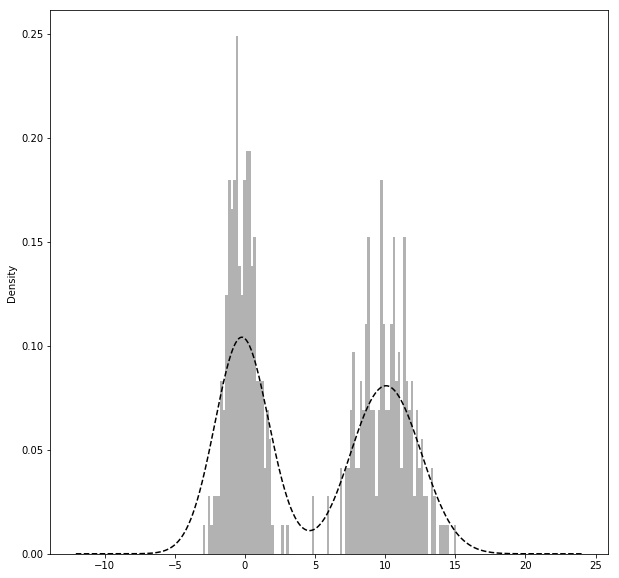

In [53]:
values.hist(bins=100, alpha=0.3, color='k', normed=True)
# values.hist(bins=100, alpha=0.3, color='k')
values.plot(kind='kde', style='k--')

### 8.2.4 산포도(Scatter plots)
o 두개의 1차원 데이터의 관계 표시에 유용
#### o matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
- A scatter plot of y vs x with varying marker size and/or color.
- Parameters
 - x, y : array_like, shape (n, ) The data positions.
 - s : scalar or array_like, shape (n, ), optional
   - The marker size in points\*\*2. 

In [54]:
macro = pd.read_csv('ch08/macrodata.csv')
macro[:10]
# macrodata 의 각  필드 참고자료: http://www.statsmodels.org/dev/datasets/generated/macrodata.html

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


In [55]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']] 
# cpi: 소비자물가지수, m1:기본 통화 공급량, tbilrate:국채이율, unemp:실업률
trans_data = np.log(data).diff().dropna() # diff(): 앞의 값과의 차이 비율
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [56]:
plt.figure()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Changes in log m1 vs. log unemp')

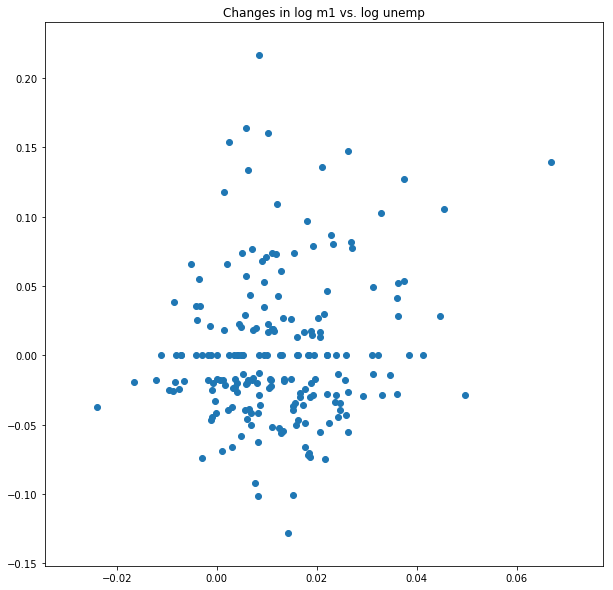

In [57]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
# trans_data.plot.scatter(x='m1',y='unemp')

#### o pandas.plotting.scatter_matrix(frame, alpha=0.5, figsize=None, ax=None, grid=False, diagonal='hist', marker='.', density_kwds=None, hist_kwds=None, **kwds)
- 모든 컬럼간의 산포도를 확인해서 데이터의 모양과 특성을 파악하는 것이 초기 기본 작업
- Parameter: 
 - frame : DataFrame 
 - alpha : amount of transparency applied 
 - figsize : a tuple (width, height) in inches 
 - ax : Matplotlib axis object 
 - grid : setting this to True will show the grid 
 - diagonal : pick between ‘kde’ and ‘hist’ for either Kernel Density Estimation or Histogram plot in the diagonal
 - marker : Matplotlib marker type, default ‘.’ 
 - hist_kwds : other plotting keyword arguments To be passed to hist function
 - density_kwds : other plotting keyword arguments. To be passed to kernel density estimate plot
 - kwds : other plotting keyword arguments, To be passed to scatter function

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013723320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014048518>]], dtype=object)

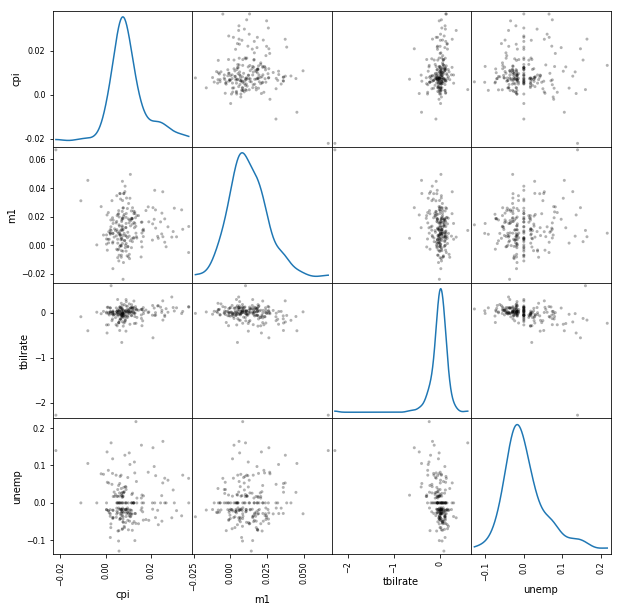

In [58]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=0.3)

## 8.3 Plotting Maps: Visualizing Haiti Earthquake Crisis data
#### Ushahidi는 비영리기업으로 자연재해를 크라우드소싱하여 데이터 제공: ch08/Haiti.csv


In [59]:
data = pd.read_csv('ch08/Haiti.csv')
data.info()
# 전체로우수인 3593이 아닌 (NULL  값 포함) 컬럼: LOCATION, CATEGORY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [60]:
data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO


In [61]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [62]:
data['CATEGORY'][:6]
# CATEGORY에는 콤마로 구본되는 여러개의 값을 포함하고 있음. 

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [63]:
data.describe()
# latitude와 longitude의 max값을 보면 오류가 존재, 

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [64]:
# latitude와 longitude의 오류 입력을 제외
# Haiti를 구글맵에서 검색하여 대략의 위도와 경도를 구해 그 외의 범위를 제외
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [65]:
# CATEGORY 값들을 처리하기 위한 함수
# 콤마로 구분된 cat list를 생성
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

# union을 이용하여 중복된 카테고리 제거 
def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

# .을 이용하여 코드와 카테고리 이름을 분리, |를 이용하여 세부카테고리만을 이름으로 선택
def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [66]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [67]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [68]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [69]:
dummy_frame.iloc[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [70]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
dummy_frame

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,1,1a,1b,1c,1d,2,2a,2b,2c,2d,...,7c,7d,7g,7h,8,8a,8c,8d,8e,8f
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
du = dummy_frame.add_prefix('category_')
# du.describe()
# data = data.join(dummy_frame.add_prefix('category_'))
data = data.join(du, lsuffix='_left')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED,...,category_7c,category_7d,category_7g,category_7h,category_8,category_8a,category_8c,category_8d,category_8e,category_8f
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


data.iloc[:, 10:15].info()

In [73]:
# mpl_toolkits는 matplotlib에 포함되나, 에러로 인헤 다음과 같이 업그레이드 해야함. 
# <관리자 모드 anaconda console> 
# conda update -n base conda
# conda upgrade matplotlib
# conda install basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\ProgramData\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


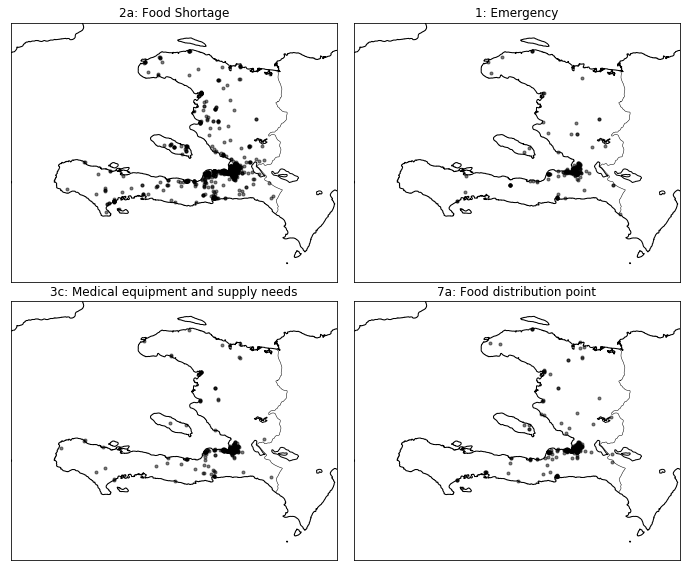

In [74]:
# 다음 지도의 실행은 5분 정도 경과 필요 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

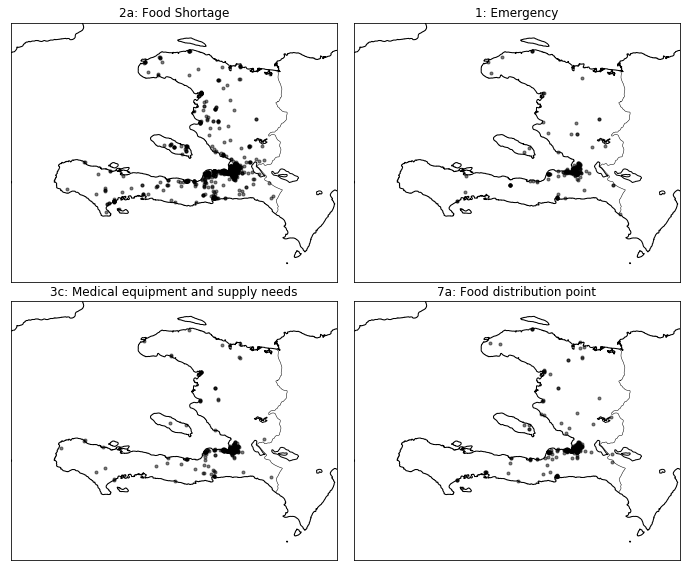

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))

# 다음 지도의 실행은 5분 정도 경과 필요
make_plot()

In [85]:
shapefile_path = 'ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

(1583,
 3,
 [-72.749246, 18.409952, 0.0, 0.0],
 [-71.973789, 18.7147105, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x10e80400>)

### 8.4 파이썬 시각화 도구 생태계
#### 8.4.1 Chaco
o 정적 그래프와 대화형 시각화 2가지 모두에 잘 어울리는 툴킷

#### 8.4.2 mayavi

#### 8.4.3 기타 패키지
PySqt
Veusz
gnuplot-py
biggles

#### 8.4.4 시각화 도구의 미래
o 기술 기반의 시각화, 즉 자바스크립트 기반의 시각화
o Data 시각화 라이브러리: http://codefactory.kr/data-visualization-libraries/